In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# run through cleaning/clean_business first
%store -r business_df
business_df: pd.DataFrame = business_df

In [2]:
business_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, iBof5Tl8vrKISbi82tFEvQ to 9999
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        10000 non-null  object 
 1   address                     10000 non-null  object 
 2   city                        10000 non-null  object 
 3   state                       10000 non-null  object 
 4   postal_code                 10000 non-null  object 
 5   latitude                    10000 non-null  float32
 6   longitude                   10000 non-null  float32
 7   stars                       10000 non-null  float32
 8   review_count                10000 non-null  float64
 9   is_open                     10000 non-null  float64
 10  categories                  10000 non-null  object 
 11  hours                       7716 non-null   object 
 12  AcceptsInsurance            413 non-null    object 
 13  AgesAllowed     

In [3]:
business_df.isna().sum()

name                          10000
address                       10000
city                          10000
state                         10000
postal_code                   10000
latitude                      10000
longitude                     10000
stars                         10000
review_count                  10000
is_open                       10000
categories                    10000
hours                         12284
AcceptsInsurance              19587
AgesAllowed                   19992
Alcohol                       17633
Ambience                      17490
BYOB                          19962
BYOBCorkage                   19927
BestNights                    19749
BikeParking                   15815
BusinessAcceptsBitcoin        19192
BusinessAcceptsCreditCards    14159
BusinessParking               14623
ByAppointmentOnly             17173
Caters                        17952
CoatCheck                     19792
Corkage                       19948
DietaryRestrictions         

### Variables - helpers

In [4]:
name = 'name'
address = 'address'
city = 'city'
state = 'state'
postal_code = 'postal_code'
latitude = 'latitude'
longitude = 'longitude'
stars = 'stars'
review_count = 'review_count'
is_open = 'is_open'
categories = 'categories'
hours = 'hours'
AcceptsInsurance = 'AcceptsInsurance'
AgesAllowed = 'AgesAllowed'
Alcohol = 'Alcohol'
Ambience = 'Ambience'
BYOB = 'BYOB'
BYOBCorkage = 'BYOBCorkage'
BestNights = 'BestNights'
BikeParking = 'BikeParking'
BusinessAcceptsBitcoin = 'BusinessAcceptsBitcoin'
BusinessAcceptsCreditCards = 'BusinessAcceptsCreditCards'
BusinessParking = 'BusinessParking'
ByAppointmentOnly = 'ByAppointmentOnly'
Caters = 'Caters'
CoatCheck = 'CoatCheck'
Corkage = 'Corkage'
DietaryRestrictions = 'DietaryRestrictions'
DogsAllowed = 'DogsAllowed'
DriveThru = 'DriveThru'
GoodForDancing = 'GoodForDancing'
GoodForKids = 'GoodForKids'
GoodForMeal = 'GoodForMeal'
HairSpecializesIn = 'HairSpecializesIn'
HappyHour = 'HappyHour'
HasTV = 'HasTV'
Music = 'Music'
NoiseLevel = 'NoiseLevel'
Open24Hours = 'Open24Hours'
OutdoorSeating = 'OutdoorSeating'
RestaurantsAttire = 'RestaurantsAttire'
RestaurantsCounterService = 'RestaurantsCounterService'
RestaurantsDelivery = 'RestaurantsDelivery'
RestaurantsGoodForGroups = 'RestaurantsGoodForGroups'
RestaurantsPriceRange2 = 'RestaurantsPriceRange2'
RestaurantsReservations = 'RestaurantsReservations'
RestaurantsTableService = 'RestaurantsTableService'
RestaurantsTakeOut = 'RestaurantsTakeOut'
Smoking = 'Smoking'
WheelchairAccessible = 'WheelchairAccessible'
WiFi = 'WiFi'

In [5]:
business_df[[stars, review_count]].describe()

,stars,review_count
count,10000.00000,10000.000000
mean,3.55045,35.067600
std,1.01852,103.118055
min,1.00000,3.000000
25%,3.00000,4.000000
50%,3.50000,9.000000
75%,4.50000,26.000000
max,5.00000,4138.000000


In [6]:
business_df.sample(3)

,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,...,RestaurantsCounterService,RestaurantsDelivery,RestaurantsGoodForGroups,RestaurantsPriceRange2,RestaurantsReservations,RestaurantsTableService,RestaurantsTakeOut,Smoking,WheelchairAccessible,WiFi
8836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,None,4,None,None,None,None,None,no
ctrZGNXApUPqwFgojoG7_A,Glen at Mesa,1233 N. Mesa Drive,Mesa,AZ,85201,33.438210,-111.819374,2.5,7.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
tdzRCSV_Ym3MgftaZZ3y9g,Service King,,Phoenix,AZ,85027,33.678238,-112.101288,5.0,48.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


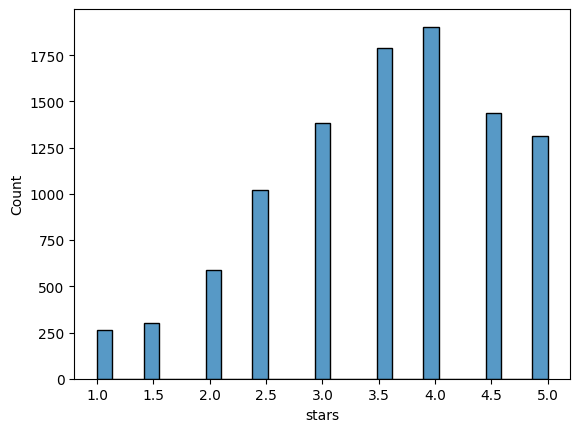

In [9]:
sns.histplot(data=business_df, x=stars)
plt.show()

review_count_median=9.0


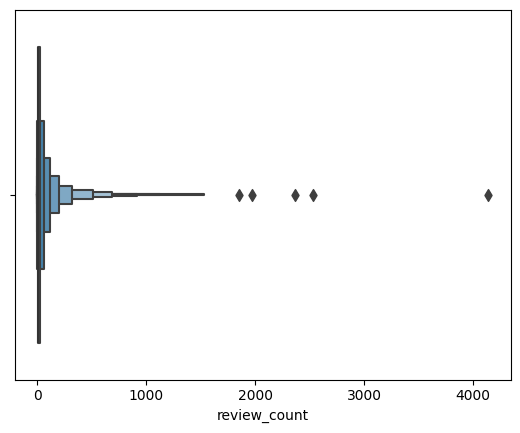

In [8]:
review_count_median = business_df[review_count].median()
print(f"{review_count_median=}")

sns.boxenplot(data=business_df, x=review_count)
plt.show()

ConversionError: Failed to convert value(s) to axis units: ['x', 'y']

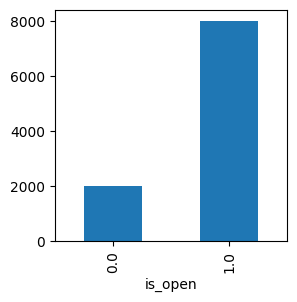

In [17]:
# y = business_df.groupby(is_open)[is_open].count().values.tolist()
# x = ['closed', 'open']
# sns.barplot(x=x, y=y)
fig, ax = plt.subplots(figsize=(3, 3))
business_df.groupby(is_open)[is_open].count().plot(kind='bar', ax=ax).set_xticks(['x', 'y'])
plt.show()